In [1]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


### 回归指标

> MSE:Mean Squared Error 均方误差  
$$\frac{1}{m} \sum_{i=1}^{m} (y_i-\hat{y_i})^2$$   

> RMSE:Root Mean Squares Error 根均方误差  
$$\sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i-\hat{y_i})^2}$$

> MAE:Mean Abs Error 平均绝对值误差  
$$ {\frac{1}{m} \sum_{i=1}^{m}\left |y_i-\hat{y_i} \right |} $$

> R Squared 决定系数  

$$
R^2 = 1 - \frac{ SS_{res}(\sum_{i}{(y_i-\hat{y})^2}) }{ SS_{total}(\sum_{i}{(y_i-\bar{y})^2}) }
$$

- 由于上述三种评价指标和数据本身有关，故提出R2进行评价
- R2分子为模型预测误差 分母为数据本身方差 
 - 值介于0，1之间 若为负数证明还不如瞎猜

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

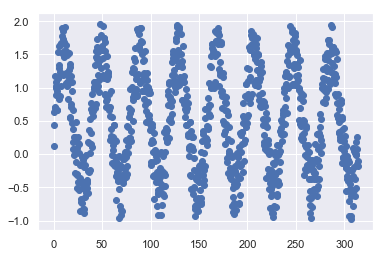

In [55]:
d=1000
x=np.linspace(0,100*np.pi,d)
noise=np.random.random((d,1))
y=np.sin(x/2/np.pi).reshape(d,1)+noise
plt.scatter(x,y)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
y_scalar = scalar.fit_transform(y)

In [63]:
def getData(x,step):
    dataX,dataY=[],[]
    for i in range(len(x)-step-1):
        dataX.append(x[i:i+step])
        dataY.append(x[i+step])
    return (np.array(dataX),np.array(dataY))
Xtrain=y_scalar[:int(len(y_scalar)*0.8)]
Xtest = y_scalar[int(len(y_scalar)*0.8):]

X_train,y_train = getData(Xtrain,10)
X_test,y_test = getData(Xtest,10)

import tensorflow as tf


In [65]:
y_train.shape

(789, 1)

In [ ]:
x=tf.placeholder(tf.float32,shape=[None,10])
y=tf.placeholder(tf.float32,shape=[None,1])



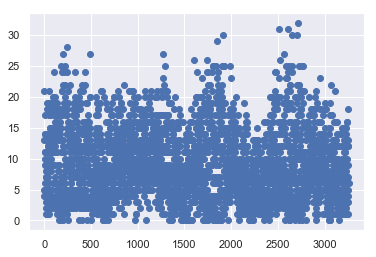

In [4]:
data =[5, 21, 13, 4, 5, 14, 10, 5, 11, 11, 6, 4, 9, 14, 17, 8, 9, 3, 11, 9, 1, 7, 11, 2, 7, 14, 2, 8, 13, 1, 4, 18, 3, 5, 19, 8, 10, 14, 9, 5, 12, 7, 12, 11, 6, 11, 18, 9, 9, 21, 3, 6, 3, 11, 17, 19, 1, 5, 17, 9, 4, 15, 2, 5, 17, 4, 14, 15, 9, 12, 18, 10, 8, 19, 3, 11, 18, 4, 15, 18, 5, 13, 15, 12, 11, 12, 2, 9, 15, 9, 3, 15, 6, 12, 11, 3, 13, 20, 9, 9, 13, 9, 13, 19, 6, 24, 18, 9, 14, 17, 6, 18, 17, 13, 15, 20, 2, 11, 18, 7, 12, 16, 11, 4, 15, 5, 15, 17, 2, 15, 17, 6, 14, 19, 2, 11, 16, 3, 17, 1, 4, 15, 3, 5, 18, 4, 13, 9, 1, 4, 9, 3, 8, 17, 1, 6, 15, 9, 8, 14, 0, 5, 17, 3, 14, 14, 2, 13, 16, 3, 6, 17, 3, 6, 18, 2, 6, 15, 3, 6, 25, 2, 5, 11, 0, 7, 24, 1, 6, 21, 6, 7, 17, 3, 13, 21, 4, 13, 22, 1, 11, 18, 1, 12, 27, 0, 3, 24, 6, 7, 11, 3, 7, 5, 4, 11, 19, 3, 6, 19, 5, 8, 20, 25, 22, 9, 9, 8, 10, 2, 2, 18, 5, 5, 17, 4, 9, 17, 4, 14, 24, 4, 8, 17, 3, 18, 28, 1, 15, 14, 2, 16, 19, 3, 8, 21, 0, 12, 2, 9, 12, 5, 4, 16, 2, 5, 13, 8, 9, 15, 4, 10, 13, 11, 10, 9, 3, 4, 14, 2, 7, 22, 3, 5, 12, 6, 7, 14, 5, 4, 15, 2, 6, 9, 14, 5, 7, 10, 5, 13, 15, 7, 9, 2, 12, 18, 2, 4, 17, 2, 12, 13, 13, 8, 18, 2, 12, 19, 4, 16, 19, 11, 11, 11, 7, 24, 12, 7, 18, 17, 5, 20, 12, 3, 11, 10, 10, 19, 13, 5, 16, 17, 2, 16, 17, 4, 16, 19, 10, 7, 13, 8, 5, 14, 12, 3, 19, 12, 12, 13, 8, 11, 12, 12, 15, 15, 3, 9, 15, 9, 8, 20, 6, 10, 7, 6, 18, 0, 10, 3, 4, 10, 3, 2, 21, 5, 4, 18, 6, 5, 12, 4, 9, 11, 2, 4, 10, 3, 5, 19, 3, 9, 14, 4, 4, 12, 0, 10, 22, 3, 9, 21, 5, 3, 8, 10, 9, 14, 7, 10, 16, 7, 5, 10, 5, 15, 14, 2, 15, 12, 6, 10, 24, 2, 16, 22, 8, 11, 16, 12, 3, 15, 5, 15, 14, 5, 11, 15, 4, 12, 19, 4, 13, 14, 2, 15, 19, 0, 16, 13, 8, 8, 15, 3, 14, 16, 2, 10, 13, 8, 11, 9, 12, 11, 17, 6, 15, 14, 6, 14, 11, 7, 6, 16, 8, 15, 20, 2, 27, 7, 7, 11, 20, 2, 3, 13, 7, 8, 3, 4, 6, 4, 6, 3, 7, 3, 0, 3, 10, 4, 4, 5, 2, 6, 1, 6, 4, 6, 8, 3, 7, 3, 11, 4, 4, 12, 2, 7, 5, 7, 7, 5, 3, 8, 2, 6, 5, 12, 5, 10, 11, 8, 14, 3, 2, 14, 5, 10, 9, 7, 15, 13, 7, 5, 20, 4, 8, 17, 7, 6, 5, 5, 6, 10, 2, 14, 19, 4, 7, 7, 1, 1, 17, 4, 7, 14, 4, 5, 18, 4, 5, 18, 3, 11, 15, 6, 8, 19, 6, 12, 13, 9, 9, 14, 4, 8, 14, 5, 9, 19, 7, 7, 11, 13, 13, 11, 5, 3, 21, 2, 11, 1, 3, 5, 21, 9, 5, 7, 2, 9, 3, 6, 9, 1, 6, 8, 6, 3, 0, 5, 7, 1, 12, 0, 4, 10, 1, 9, 20, 5, 0, 12, 2, 4, 8, 1, 4, 6, 4, 12, 2, 6, 7, 4, 5, 12, 0, 6, 19, 5, 6, 12, 5, 4, 16, 6, 6, 14, 4, 2, 18, 3, 7, 13, 1, 9, 1, 4, 8, 9, 2, 5, 3, 2, 13, 16, 0, 11, 3, 5, 4, 14, 5, 16, 3, 5, 9, 2, 4, 18, 8, 3, 12, 15, 5, 15, 4, 7, 13, 5, 3, 12, 6, 11, 15, 3, 8, 13, 4, 8, 17, 1, 5, 17, 1, 8, 17, 5, 8, 19, 7, 7, 13, 4, 8, 12, 1, 6, 6, 11, 3, 12, 3, 3, 7, 10, 5, 4, 20, 6, 9, 20, 3, 8, 11, 3, 7, 10, 5, 10, 15, 5, 12, 16, 4, 8, 13, 3, 14, 11, 5, 15, 9, 8, 10, 11, 10, 10, 10, 9, 11, 12, 9, 8, 18, 12, 12, 17, 13, 4, 21, 5, 9, 17, 8, 14, 13, 6, 8, 18, 7, 11, 14, 5, 2, 20, 9, 5, 9, 4, 6, 10, 17, 10, 12, 8, 4, 15, 2, 19, 14, 14, 13, 10, 11, 19, 7, 9, 14, 14, 8, 7, 10, 10, 14, 12, 6, 6, 18, 11, 8, 16, 11, 13, 11, 10, 7, 15, 13, 11, 9, 6, 9, 5, 3, 1, 22, 5, 6, 4, 8, 12, 10, 14, 8, 6, 11, 6, 12, 10, 6, 15, 5, 10, 10, 8, 4, 9, 6, 12, 9, 9, 8, 10, 14, 9, 8, 10, 14, 5, 16, 9, 3, 10, 9, 10, 11, 11, 8, 9, 15, 9, 10, 14, 6, 13, 17, 9, 9, 11, 15, 21, 7, 10, 19, 5, 17, 8, 13, 16, 13, 7, 11, 16, 4, 9, 12, 10, 5, 8, 10, 14, 16, 8, 6, 9, 21, 7, 15, 8, 8, 12, 11, 11, 14, 5, 21, 10, 14, 5, 13, 9, 18, 14, 9, 13, 13, 17, 8, 20, 4, 9, 13, 8, 14, 16, 10, 19, 12, 16, 9, 13, 10, 4, 14, 7, 10, 0, 12, 5, 1, 12, 10, 3, 13, 1, 6, 9, 8, 5, 10, 8, 9, 9, 16, 6, 10, 11, 7, 20, 18, 8, 7, 15, 3, 12, 8, 6, 10, 10, 8, 9, 10, 6, 15, 18, 12, 11, 11, 5, 9, 9, 2, 12, 10, 9, 8, 12, 13, 10, 16, 9, 9, 18, 7, 15, 17, 10, 15, 10, 10, 9, 7, 17, 10, 17, 7, 13, 8, 9, 10, 11, 8, 6, 15, 11, 9, 16, 15, 13, 6, 6, 5, 14, 13, 12, 17, 4, 8, 7, 5, 10, 12, 11, 14, 13, 15, 15, 20, 11, 16, 11, 6, 11, 21, 9, 8, 10, 0, 11, 18, 13, 12, 17, 5, 12, 13, 12, 3, 9, 13, 3, 7, 13, 5, 7, 12, 5, 6, 12, 6, 7, 8, 5, 11, 11, 16, 11, 16, 6, 6, 19, 2, 7, 20, 6, 8, 18, 5, 8, 13, 5, 13, 12, 10, 7, 20, 5, 8, 14, 8, 9, 17, 10, 5, 10, 7, 9, 21, 9, 5, 12, 16, 9, 17, 9, 14, 16, 13, 10, 16, 13, 6, 13, 10, 15, 9, 15, 13, 8, 9, 11, 7, 14, 12, 14, 8, 10, 10, 12, 12, 10, 10, 6, 15, 8, 7, 20, 3, 9, 16, 3, 7, 12, 3, 7, 17, 7, 8, 17, 6, 8, 15, 15, 13, 21, 9, 12, 20, 3, 7, 11, 11, 7, 16, 7, 5, 9, 4, 8, 10, 2, 2, 13, 8, 8, 10, 6, 10, 14, 5, 8, 17, 9, 12, 14, 3, 6, 7, 11, 10, 13, 3, 13, 10, 2, 2, 21, 5, 14, 14, 4, 10, 17, 8, 14, 14, 4, 6, 15, 1, 4, 17, 8, 5, 20, 6, 6, 15, 11, 7, 23, 9, 12, 27, 4, 6, 17, 8, 5, 15, 8, 9, 9, 6, 12, 22, 5, 1, 25, 7, 11, 14, 9, 8, 21, 9, 6, 16, 8, 8, 15, 8, 9, 12, 5, 12, 14, 15, 12, 21, 6, 6, 8, 11, 12, 6, 17, 7, 20, 4, 5, 9, 15, 13, 17, 11, 3, 8, 16, 17, 19, 6, 6, 19, 3, 5, 8, 3, 0, 7, 1, 3, 7, 3, 9, 5, 2, 13, 1, 3, 11, 0, 4, 11, 0, 5, 19, 0, 3, 15, 1, 7, 15, 0, 3, 16, 1, 7, 13, 2, 8, 13, 6, 7, 7, 6, 8, 14, 5, 14, 4, 5, 13, 7, 1, 10, 5, 5, 12, 11, 7, 3, 18, 10, 6, 9, 3, 8, 10, 4, 13, 20, 5, 15, 1, 5, 4, 12, 2, 12, 9, 4, 8, 12, 3, 16, 8, 7, 11, 12, 9, 11, 8, 11, 8, 9, 6, 15, 6, 3, 9, 5, 5, 15, 10, 5, 7, 13, 8, 12, 9, 9, 18, 5, 5, 13, 7, 9, 10, 5, 12, 17, 6, 6, 16, 4, 8, 2, 8, 2, 3, 4, 2, 1, 0, 1, 8, 1, 4, 8, 1, 8, 2, 2, 7, 2, 2, 1, 1, 16, 1, 4, 6, 1, 6, 0, 2, 7, 2, 4, 11, 2, 4, 13, 7, 8, 1, 5, 6, 5, 3, 4, 2, 7, 11, 1, 7, 8, 9, 5, 4, 4, 14, 4, 6, 6, 5, 6, 12, 0, 7, 8, 7, 5, 14, 11, 5, 6, 1, 5, 11, 2, 1, 15, 6, 9, 13, 10, 10, 11, 4, 10, 11, 0, 2, 13, 7, 8, 13, 0, 9, 8, 2, 10, 14, 0, 5, 8, 6, 5, 9, 5, 7, 16, 6, 8, 7, 3, 9, 6, 3, 18, 0, 10, 13, 0, 6, 11, 5, 5, 16, 0, 13, 9, 9, 5, 11, 7, 3, 13, 10, 6, 11, 9, 6, 10, 7, 12, 10, 10, 26, 17, 4, 8, 12, 6, 7, 11, 5, 5, 12, 4, 4, 10, 11, 6, 19, 3, 5, 15, 1, 6, 12, 10, 5, 20, 6, 7, 15, 7, 8, 14, 8, 10, 20, 5, 9, 24, 9, 16, 17, 9, 11, 8, 4, 17, 10, 10, 9, 8, 1, 11, 13, 2, 10, 9, 7, 12, 12, 5, 15, 12, 4, 16, 17, 8, 6, 20, 7, 9, 18, 2, 15, 11, 6, 14, 18, 8, 10, 17, 3, 16, 17, 2, 6, 23, 2, 14, 20, 5, 8, 18, 4, 10, 17, 5, 2, 7, 0, 6, 7, 2, 5, 12, 3, 4, 19, 2, 7, 11, 0, 8, 8, 6, 10, 21, 1, 13, 11, 6, 8, 14, 3, 14, 18, 3, 3, 12, 4, 19, 18, 0, 5, 16, 1, 5, 17, 4, 3, 26, 5, 7, 18, 0, 5, 24, 2, 8, 24, 3, 11, 12, 9, 20, 19, 0, 22, 13, 7, 12, 19, 1, 9, 22, 1, 8, 15, 1, 12, 17, 1, 18, 22, 2, 9, 18, 2, 16, 15, 3, 9, 12, 2, 9, 13, 4, 17, 15, 9, 12, 16, 2, 9, 21, 2, 12, 19, 4, 15, 24, 4, 7, 15, 0, 14, 25, 4, 10, 25, 2, 6, 13, 2, 10, 15, 3, 7, 12, 0, 7, 11, 1, 7, 11, 1, 14, 6, 0, 6, 17, 2, 10, 25, 0, 13, 19, 4, 11, 20, 1, 9, 13, 0, 6, 29, 1, 13, 20, 0, 12, 19, 4, 1, 23, 7, 24, 17, 1, 14, 21, 0, 22, 21, 4, 9, 18, 3, 20, 21, 0, 6, 17, 0, 18, 16, 6, 19, 20, 0, 5, 15, 5, 7, 11, 0, 18, 20, 0, 16, 10, 0, 21, 14, 4, 12, 19, 0, 17, 12, 4, 20, 22, 5, 18, 25, 2, 11, 30, 1, 11, 19, 5, 10, 19, 2, 12, 19, 1, 5, 25, 1, 8, 17, 1, 10, 25, 4, 8, 15, 5, 14, 9, 3, 7, 19, 3, 2, 14, 7, 5, 13, 9, 9, 14, 9, 6, 8, 15, 4, 7, 6, 11, 10, 11, 5, 14, 15, 7, 7, 11, 4, 14, 6, 4, 7, 14, 0, 11, 17, 3, 14, 10, 6, 4, 12, 7, 10, 17, 5, 15, 9, 3, 13, 12, 4, 8, 25, 4, 3, 17, 6, 9, 18, 7, 5, 15, 12, 9, 16, 9, 5, 23, 5, 17, 12, 6, 11, 13, 12, 15, 11, 8, 5, 8, 10, 13, 10, 19, 10, 10, 12, 10, 18, 13, 10, 14, 9, 13, 7, 10, 10, 17, 5, 9, 16, 10, 8, 13, 6, 10, 16, 6, 11, 13, 14, 9, 15, 10, 4, 20, 12, 9, 12, 8, 9, 14, 5, 7, 4, 9, 3, 5, 9, 3, 4, 6, 3, 1, 6, 17, 3, 5, 8, 1, 3, 7, 3, 5, 15, 2, 6, 2, 3, 1, 0, 3, 8, 8, 2, 5, 12, 6, 10, 9, 6, 2, 10, 4, 6, 6, 2, 3, 10, 1, 6, 10, 9, 7, 14, 4, 8, 12, 1, 9, 10, 3, 7, 8, 9, 9, 10, 3, 6, 11, 2, 9, 13, 3, 9, 5, 3, 7, 19, 6, 5, 8, 4, 11, 9, 5, 5, 8, 3, 5, 14, 4, 9, 15, 2, 5, 15, 1, 4, 9, 7, 17, 12, 4, 6, 11, 5, 7, 16, 6, 3, 16, 12, 8, 12, 12, 5, 14, 10, 10, 15, 5, 1, 4, 2, 2, 6, 5, 3, 2, 5, 4, 5, 4, 2, 3, 4, 0, 3, 5, 1, 4, 1, 2, 5, 2, 10, 0, 3, 8, 0, 7, 4, 2, 7, 0, 1, 5, 1, 4, 10, 3, 5, 11, 0, 2, 9, 3, 4, 8, 6, 3, 6, 4, 9, 0, 1, 8, 2, 2, 13, 3, 2, 8, 0, 8, 7, 3, 9, 6, 5, 11, 2, 5, 9, 1, 6, 13, 5, 12, 12, 2, 3, 7, 3, 5, 5, 2, 2, 8, 3, 8, 7, 4, 12, 10, 3, 5, 13, 2, 9, 6, 3, 3, 15, 6, 5, 12, 2, 11, 12, 7, 13, 2, 4, 7, 11, 3, 5, 5, 1, 10, 3, 1, 6, 1, 3, 2, 3, 2, 1, 1, 3, 3, 5, 2, 10, 3, 6, 1, 3, 9, 4, 4, 3, 11, 5, 3, 3, 2, 1, 8, 6, 6, 2, 3, 4, 4, 3, 7, 4, 4, 7, 2, 13, 5, 7, 5, 6, 2, 9, 2, 3, 12, 2, 5, 16, 3, 4, 5, 3, 0, 7, 4, 7, 3, 3, 10, 4, 3, 13, 2, 4, 5, 1, 8, 14, 2, 2, 7, 4, 3, 7, 2, 2, 9, 4, 3, 9, 2, 7, 16, 2, 7, 1, 4, 6, 10, 6, 7, 8, 5, 12, 2, 5, 9, 2, 4, 8, 14, 3, 10, 14, 6, 11, 0, 6, 11, 2, 7, 20, 6, 17, 6, 4, 15, 4, 7, 17, 6, 3, 13, 2, 7, 13, 1, 3, 10, 9, 7, 16, 7, 6, 20, 4, 8, 12, 7, 9, 14, 7, 5, 17, 11, 8, 14, 7, 7, 16, 5, 6, 13, 8, 5, 18, 3, 11, 19, 7, 5, 24, 2, 8, 21, 3, 11, 14, 4, 12, 11, 4, 8, 14, 1, 10, 24, 7, 7, 19, 11, 9, 18, 8, 6, 20, 4, 8, 19, 5, 7, 18, 2, 6, 12, 9, 10, 20, 7, 6, 16, 5, 7, 23, 3, 2, 31, 5, 7, 14, 10, 8, 9, 8, 11, 20, 5, 7, 26, 7, 6, 16, 8, 8, 16, 6, 8, 16, 8, 15, 15, 4, 12, 5, 5, 3, 5, 14, 6, 3, 16, 3, 4, 16, 5, 9, 19, 2, 4, 12, 3, 7, 15, 4, 4, 16, 6, 6, 16, 3, 9, 15, 2, 7, 17, 4, 10, 27, 3, 7, 14, 0, 7, 15, 5, 5, 19, 6, 8, 23, 2, 6, 20, 2, 6, 18, 8, 13, 25, 1, 5, 19, 3, 3, 21, 2, 7, 23, 5, 12, 12, 3, 18, 24, 3, 13, 31, 3, 5, 19, 4, 2, 12, 1, 7, 16, 0, 19, 25, 2, 10, 21, 0, 10, 22, 6, 11, 11, 8, 5, 22, 5, 9, 12, 3, 6, 19, 6, 7, 16, 3, 6, 25, 4, 14, 24, 3, 8, 30, 14, 8, 14, 6, 3, 2, 10, 1, 2, 18, 1, 2, 15, 3, 3, 9, 3, 6, 11, 3, 10, 9, 7, 10, 12, 3, 8, 20, 0, 2, 15, 1, 16, 13, 1, 6, 13, 5, 11, 16, 2, 4, 14, 2, 15, 15, 2, 16, 20, 2, 6, 19, 2, 10, 30, 2, 10, 22, 2, 11, 32, 4, 3, 20, 4, 11, 17, 1, 11, 25, 0, 14, 22, 1, 10, 22, 5, 7, 17, 1, 8, 21, 3, 4, 18, 3, 5, 12, 7, 14, 17, 4, 18, 20, 4, 13, 21, 4, 10, 18, 3, 5, 15, 3, 11, 25, 1, 6, 21, 0, 11, 19, 3, 6, 16, 2, 9, 25, 2, 11, 21, 4, 9, 21, 2, 8, 7, 3, 10, 2, 2, 10, 5, 2, 6, 7, 5, 8, 9, 3, 6, 11, 7, 10, 9, 4, 13, 15, 0, 9, 14, 2, 9, 9, 5, 5, 16, 8, 9, 16, 3, 7, 9, 5, 7, 7, 11, 9, 16, 4, 16, 15, 5, 6, 8, 5, 10, 17, 5, 8, 10, 14, 9, 8, 7, 20, 5, 6, 10, 14, 9, 8, 12, 9, 8, 15, 11, 12, 14, 13, 5, 17, 9, 13, 18, 5, 12, 7, 11, 10, 13, 12, 12, 9, 9, 14, 17, 6, 7, 18, 6, 5, 11, 12, 14, 3, 12, 7, 11, 17, 10, 12, 10, 8, 16, 7, 11, 13, 15, 13, 20, 4, 18, 9, 10, 1, 5, 5, 3, 7, 7, 4, 4, 13, 5, 2, 21, 5, 4, 7, 0, 7, 9, 3, 5, 11, 3, 6, 19, 5, 6, 11, 12, 7, 12, 3, 9, 16, 7, 7, 8, 1, 6, 16, 6, 3, 10, 8, 11, 14, 9, 10, 16, 6, 13, 23, 8, 4, 18, 4, 5, 12, 5, 5, 11, 5, 9, 16, 4, 13, 18, 12, 12, 14, 8, 10, 10, 12, 12, 14, 8, 14, 14, 12, 12, 17, 7, 5, 11, 5, 5, 13, 1, 14, 7, 10, 9, 14, 9, 7, 11, 6, 8, 10, 9, 10, 18, 10, 8, 7, 5, 18, 19, 10, 10, 15, 9, 13, 10, 18, 5, 12, 7, 9, 6, 1, 3, 3, 5, 3, 7, 4, 6, 5, 2, 6, 2, 2, 4, 6, 1, 7, 8, 6, 3, 6, 4, 5, 11, 4, 10, 15, 5, 11, 0, 3, 14, 0, 10, 10, 0, 1, 15, 1, 6, 17, 0, 12, 19, 1, 6, 12, 1, 10, 5, 3, 2, 22, 3, 8, 11, 5, 5, 17, 4, 4, 12, 1, 5, 11, 4, 6, 10, 5, 11, 13, 3, 9, 7, 4, 7, 1, 13, 11, 10, 3, 6, 6, 4, 9, 5, 8, 16, 4, 7, 21, 5, 4, 9, 6, 5, 9, 9, 10, 12, 12, 3, 16, 1, 5, 6, 10, 10, 13, 9, 12, 16, 2, 14, 12, 10, 4, 7, 7, 6, 2, 4, 6, 4, 10, 7, 4, 3, 2, 8, 3, 5, 4, 3, 5, 1, 12, 0, 7, 4, 2, 7, 2, 8, 7, 2, 4, 4, 4, 8, 8, 14, 3, 9, 2, 1, 8, 5, 14, 1, 4, 8, 1, 8, 9, 3, 4, 15, 2, 1, 10, 3, 6, 12, 1, 4, 8, 2, 5, 10, 5, 7, 6, 4, 12, 3, 7, 11, 7, 1, 13, 15, 5, 12, 1, 9, 15, 1, 6, 12, 1, 7, 11, 5, 10, 11, 2, 14, 9, 5, 8, 9, 9, 15, 5, 6, 9, 7, 3, 10, 7, 6, 16, 3, 7, 16, 1, 9, 13, 1, 6, 12, 5, 7, 18, 4, 3, 12, 6]
for i in rangeedddddddddsdeeeeeeedd
plt.plot(data,'o')

In [5]:
# from user import predict as BPpredict
#from PSO import *
data =[5, 21, 13, 4, 5, 14, 10, 5, 11, 11, 6, 4, 9, 14, 17, 8, 9, 3, 11, 9, 1, 7, 11, 2, 7, 14, 2, 8, 13, 1, 4, 18, 3, 5, 19, 8, 10, 14, 9, 5, 12, 7, 12, 11, 6, 11, 18, 9, 9, 21, 3, 6, 3, 11, 17, 19, 1, 5, 17, 9, 4, 15, 2, 5, 17, 4, 14, 15, 9, 12, 18, 10, 8, 19, 3, 11, 18, 4, 15, 18, 5, 13, 15, 12, 11, 12, 2, 9, 15, 9, 3, 15, 6, 12, 11, 3, 13, 20, 9, 9, 13, 9, 13, 19, 6, 24, 18, 9, 14, 17, 6, 18, 17, 13, 15, 20, 2, 11, 18, 7, 12, 16, 11, 4, 15, 5, 15, 17, 2, 15, 17, 6, 14, 19, 2, 11, 16, 3, 17, 1, 4, 15, 3, 5, 18, 4, 13, 9, 1, 4, 9, 3, 8, 17, 1, 6, 15, 9, 8, 14, 0, 5, 17, 3, 14, 14, 2, 13, 16, 3, 6, 17, 3, 6, 18, 2, 6, 15, 3, 6, 25, 2, 5, 11, 0, 7, 24, 1, 6, 21, 6, 7, 17, 3, 13, 21, 4, 13, 22, 1, 11, 18, 1, 12, 27, 0, 3, 24, 6, 7, 11, 3, 7, 5, 4, 11, 19, 3, 6, 19, 5, 8, 20, 25, 22, 9, 9, 8, 10, 2, 2, 18, 5, 5, 17, 4, 9, 17, 4, 14, 24, 4, 8, 17, 3, 18, 28, 1, 15, 14, 2, 16, 19, 3, 8, 21, 0, 12, 2, 9, 12, 5, 4, 16, 2, 5, 13, 8, 9, 15, 4, 10, 13, 11, 10, 9, 3, 4, 14, 2, 7, 22, 3, 5, 12, 6, 7, 14, 5, 4, 15, 2, 6, 9, 14, 5, 7, 10, 5, 13, 15, 7, 9, 2, 12, 18, 2, 4, 17, 2, 12, 13, 13, 8, 18, 2, 12, 19, 4, 16, 19, 11, 11, 11, 7, 24, 12, 7, 18, 17, 5, 20, 12, 3, 11, 10, 10, 19, 13, 5, 16, 17, 2, 16, 17, 4, 16, 19, 10, 7, 13, 8, 5, 14, 12, 3, 19, 12, 12, 13, 8, 11, 12, 12, 15, 15, 3, 9, 15, 9, 8, 20, 6, 10, 7, 6, 18, 0, 10, 3, 4, 10, 3, 2, 21, 5, 4, 18, 6, 5, 12, 4, 9, 11, 2, 4, 10, 3, 5, 19, 3, 9, 14, 4, 4, 12, 0, 10, 22, 3, 9, 21, 5, 3, 8, 10, 9, 14, 7, 10, 16, 7, 5, 10, 5, 15, 14, 2, 15, 12, 6, 10, 24, 2, 16, 22, 8, 11, 16, 12, 3, 15, 5, 15, 14, 5, 11, 15, 4, 12, 19, 4, 13, 14, 2, 15, 19, 0, 16, 13, 8, 8, 15, 3, 14, 16, 2, 10, 13, 8, 11, 9, 12, 11, 17, 6, 15, 14, 6, 14, 11, 7, 6, 16, 8, 15, 20, 2, 27, 7, 7, 11, 20, 2, 3, 13, 7, 8, 3, 4, 6, 4, 6, 3, 7, 3, 0, 3, 10, 4, 4, 5, 2, 6, 1, 6, 4, 6, 8, 3, 7, 3, 11, 4, 4, 12, 2, 7, 5, 7, 7, 5, 3, 8, 2, 6, 5, 12, 5, 10, 11, 8, 14, 3, 2, 14, 5, 10, 9, 7, 15, 13, 7, 5, 20, 4, 8, 17, 7, 6, 5, 5, 6, 10, 2, 14, 19, 4, 7, 7, 1, 1, 17, 4, 7, 14, 4, 5, 18, 4, 5, 18, 3, 11, 15, 6, 8, 19, 6, 12, 13, 9, 9, 14, 4, 8, 14, 5, 9, 19, 7, 7, 11, 13, 13, 11, 5, 3, 21, 2, 11, 1, 3, 5, 21, 9, 5, 7, 2, 9, 3, 6, 9, 1, 6, 8, 6, 3, 0, 5, 7, 1, 12, 0, 4, 10, 1, 9, 20, 5, 0, 12, 2, 4, 8, 1, 4, 6, 4, 12, 2, 6, 7, 4, 5, 12, 0, 6, 19, 5, 6, 12, 5, 4, 16, 6, 6, 14, 4, 2, 18, 3, 7, 13, 1, 9, 1, 4, 8, 9, 2, 5, 3, 2, 13, 16, 0, 11, 3, 5, 4, 14, 5, 16, 3, 5, 9, 2, 4, 18, 8, 3, 12, 15, 5, 15, 4, 7, 13, 5, 3, 12, 6, 11, 15, 3, 8, 13, 4, 8, 17, 1, 5, 17, 1, 8, 17, 5, 8, 19, 7, 7, 13, 4, 8, 12, 1, 6, 6, 11, 3, 12, 3, 3, 7, 10, 5, 4, 20, 6, 9, 20, 3, 8, 11, 3, 7, 10, 5, 10, 15, 5, 12, 16, 4, 8, 13, 3, 14, 11, 5, 15, 9, 8, 10, 11, 10, 10, 10, 9, 11, 12, 9, 8, 18, 12, 12, 17, 13, 4, 21, 5, 9, 17, 8, 14, 13, 6, 8, 18, 7, 11, 14, 5, 2, 20, 9, 5, 9, 4, 6, 10, 17, 10, 12, 8, 4, 15, 2, 19, 14, 14, 13, 10, 11, 19, 7, 9, 14, 14, 8, 7, 10, 10, 14, 12, 6, 6, 18, 11, 8, 16, 11, 13, 11, 10, 7, 15, 13, 11, 9, 6, 9, 5, 3, 1, 22, 5, 6, 4, 8, 12, 10, 14, 8, 6, 11, 6, 12, 10, 6, 15, 5, 10, 10, 8, 4, 9, 6, 12, 9, 9, 8, 10, 14, 9, 8, 10, 14, 5, 16, 9, 3, 10, 9, 10, 11, 11, 8, 9, 15, 9, 10, 14, 6, 13, 17, 9, 9, 11, 15, 21, 7, 10, 19, 5, 17, 8, 13, 16, 13, 7, 11, 16, 4, 9, 12, 10, 5, 8, 10, 14, 16, 8, 6, 9, 21, 7, 15, 8, 8, 12, 11, 11, 14, 5, 21, 10, 14, 5, 13, 9, 18, 14, 9, 13, 13, 17, 8, 20, 4, 9, 13, 8, 14, 16, 10, 19, 12, 16, 9, 13, 10, 4, 14, 7, 10, 0, 12, 5, 1, 12, 10, 3, 13, 1, 6, 9, 8, 5, 10, 8, 9, 9, 16, 6, 10, 11, 7, 20, 18, 8, 7, 15, 3, 12, 8, 6, 10, 10, 8, 9, 10, 6, 15, 18, 12, 11, 11, 5, 9, 9, 2, 12, 10, 9, 8, 12, 13, 10, 16, 9, 9, 18, 7, 15, 17, 10, 15, 10, 10, 9, 7, 17, 10, 17, 7, 13, 8, 9, 10, 11, 8, 6, 15, 11, 9, 16, 15, 13, 6, 6, 5, 14, 13, 12, 17, 4, 8, 7, 5, 10, 12, 11, 14, 13, 15, 15, 20, 11, 16, 11, 6, 11, 21, 9, 8, 10, 0, 11, 18, 13, 12, 17, 5, 12, 13, 12, 3, 9, 13, 3, 7, 13, 5, 7, 12, 5, 6, 12, 6, 7, 8, 5, 11, 11, 16, 11, 16, 6, 6, 19, 2, 7, 20, 6, 8, 18, 5, 8, 13, 5, 13, 12, 10, 7, 20, 5, 8, 14, 8, 9, 17, 10, 5, 10, 7, 9, 21, 9, 5, 12, 16, 9, 17, 9, 14, 16, 13, 10, 16, 13, 6, 13, 10, 15, 9, 15, 13, 8, 9, 11, 7, 14, 12, 14, 8, 10, 10, 12, 12, 10, 10, 6, 15, 8, 7, 20, 3, 9, 16, 3, 7, 12, 3, 7, 17, 7, 8, 17, 6, 8, 15, 15, 13, 21, 9, 12, 20, 3, 7, 11, 11, 7, 16, 7, 5, 9, 4, 8, 10, 2, 2, 13, 8, 8, 10, 6, 10, 14, 5, 8, 17, 9, 12, 14, 3, 6, 7, 11, 10, 13, 3, 13, 10, 2, 2, 21, 5, 14, 14, 4, 10, 17, 8, 14, 14, 4, 6, 15, 1, 4, 17, 8, 5, 20, 6, 6, 15, 11, 7, 23, 9, 12, 27, 4, 6, 17, 8, 5, 15, 8, 9, 9, 6, 12, 22, 5, 1, 25, 7, 11, 14, 9, 8, 21, 9, 6, 16, 8, 8, 15, 8, 9, 12, 5, 12, 14, 15, 12, 21, 6, 6, 8, 11, 12, 6, 17, 7, 20, 4, 5, 9, 15, 13, 17, 11, 3, 8, 16, 17, 19, 6, 6, 19, 3, 5, 8, 3, 0, 7, 1, 3, 7, 3, 9, 5, 2, 13, 1, 3, 11, 0, 4, 11, 0, 5, 19, 0, 3, 15, 1, 7, 15, 0, 3, 16, 1, 7, 13, 2, 8, 13, 6, 7, 7, 6, 8, 14, 5, 14, 4, 5, 13, 7, 1, 10, 5, 5, 12, 11, 7, 3, 18, 10, 6, 9, 3, 8, 10, 4, 13, 20, 5, 15, 1, 5, 4, 12, 2, 12, 9, 4, 8, 12, 3, 16, 8, 7, 11, 12, 9, 11, 8, 11, 8, 9, 6, 15, 6, 3, 9, 5, 5, 15, 10, 5, 7, 13, 8, 12, 9, 9, 18, 5, 5, 13, 7, 9, 10, 5, 12, 17, 6, 6, 16, 4, 8, 2, 8, 2, 3, 4, 2, 1, 0, 1, 8, 1, 4, 8, 1, 8, 2, 2, 7, 2, 2, 1, 1, 16, 1, 4, 6, 1, 6, 0, 2, 7, 2, 4, 11, 2, 4, 13, 7, 8, 1, 5, 6, 5, 3, 4, 2, 7, 11, 1, 7, 8, 9, 5, 4, 4, 14, 4, 6, 6, 5, 6, 12, 0, 7, 8, 7, 5, 14, 11, 5, 6, 1, 5, 11, 2, 1, 15, 6, 9, 13, 10, 10, 11, 4, 10, 11, 0, 2, 13, 7, 8, 13, 0, 9, 8, 2, 10, 14, 0, 5, 8, 6, 5, 9, 5, 7, 16, 6, 8, 7, 3, 9, 6, 3, 18, 0, 10, 13, 0, 6, 11, 5, 5, 16, 0, 13, 9, 9, 5, 11, 7, 3, 13, 10, 6, 11, 9, 6, 10, 7, 12, 10, 10, 26, 17, 4, 8, 12, 6, 7, 11, 5, 5, 12, 4, 4, 10, 11, 6, 19, 3, 5, 15, 1, 6, 12, 10, 5, 20, 6, 7, 15, 7, 8, 14, 8, 10, 20, 5, 9, 24, 9, 16, 17, 9, 11, 8, 4, 17, 10, 10, 9, 8, 1, 11, 13, 2, 10, 9, 7, 12, 12, 5, 15, 12, 4, 16, 17, 8, 6, 20, 7, 9, 18, 2, 15, 11, 6, 14, 18, 8, 10, 17, 3, 16, 17, 2, 6, 23, 2, 14, 20, 5, 8, 18, 4, 10, 17, 5, 2, 7, 0, 6, 7, 2, 5, 12, 3, 4, 19, 2, 7, 11, 0, 8, 8, 6, 10, 21, 1, 13, 11, 6, 8, 14, 3, 14, 18, 3, 3, 12, 4, 19, 18, 0, 5, 16, 1, 5, 17, 4, 3, 26, 5, 7, 18, 0, 5, 24, 2, 8, 24, 3, 11, 12, 9, 20, 19, 0, 22, 13, 7, 12, 19, 1, 9, 22, 1, 8, 15, 1, 12, 17, 1, 18, 22, 2, 9, 18, 2, 16, 15, 3, 9, 12, 2, 9, 13, 4, 17, 15, 9, 12, 16, 2, 9, 21, 2, 12, 19, 4, 15, 24, 4, 7, 15, 0, 14, 25, 4, 10, 25, 2, 6, 13, 2, 10, 15, 3, 7, 12, 0, 7, 11, 1, 7, 11, 1, 14, 6, 0, 6, 17, 2, 10, 25, 0, 13, 19, 4, 11, 20, 1, 9, 13, 0, 6, 29, 1, 13, 20, 0, 12, 19, 4, 1, 23, 7, 24, 17, 1, 14, 21, 0, 22, 21, 4, 9, 18, 3, 20, 21, 0, 6, 17, 0, 18, 16, 6, 19, 20, 0, 5, 15, 5, 7, 11, 0, 18, 20, 0, 16, 10, 0, 21, 14, 4, 12, 19, 0, 17, 12, 4, 20, 22, 5, 18, 25, 2, 11, 30, 1, 11, 19, 5, 10, 19, 2, 12, 19, 1, 5, 25, 1, 8, 17, 1, 10, 25, 4, 8, 15, 5, 14, 9, 3, 7, 19, 3, 2, 14, 7, 5, 13, 9, 9, 14, 9, 6, 8, 15, 4, 7, 6, 11, 10, 11, 5, 14, 15, 7, 7, 11, 4, 14, 6, 4, 7, 14, 0, 11, 17, 3, 14, 10, 6, 4, 12, 7, 10, 17, 5, 15, 9, 3, 13, 12, 4, 8, 25, 4, 3, 17, 6, 9, 18, 7, 5, 15, 12, 9, 16, 9, 5, 23, 5, 17, 12, 6, 11, 13, 12, 15, 11, 8, 5, 8, 10, 13, 10, 19, 10, 10, 12, 10, 18, 13, 10, 14, 9, 13, 7, 10, 10, 17, 5, 9, 16, 10, 8, 13, 6, 10, 16, 6, 11, 13, 14, 9, 15, 10, 4, 20, 12, 9, 12, 8, 9, 14, 5, 7, 4, 9, 3, 5, 9, 3, 4, 6, 3, 1, 6, 17, 3, 5, 8, 1, 3, 7, 3, 5, 15, 2, 6, 2, 3, 1, 0, 3, 8, 8, 2, 5, 12, 6, 10, 9, 6, 2, 10, 4, 6, 6, 2, 3, 10, 1, 6, 10, 9, 7, 14, 4, 8, 12, 1, 9, 10, 3, 7, 8, 9, 9, 10, 3, 6, 11, 2, 9, 13, 3, 9, 5, 3, 7, 19, 6, 5, 8, 4, 11, 9, 5, 5, 8, 3, 5, 14, 4, 9, 15, 2, 5, 15, 1, 4, 9, 7, 17, 12, 4, 6, 11, 5, 7, 16, 6, 3, 16, 12, 8, 12, 12, 5, 14, 10, 10, 15, 5, 1, 4, 2, 2, 6, 5, 3, 2, 5, 4, 5, 4, 2, 3, 4, 0, 3, 5, 1, 4, 1, 2, 5, 2, 10, 0, 3, 8, 0, 7, 4, 2, 7, 0, 1, 5, 1, 4, 10, 3, 5, 11, 0, 2, 9, 3, 4, 8, 6, 3, 6, 4, 9, 0, 1, 8, 2, 2, 13, 3, 2, 8, 0, 8, 7, 3, 9, 6, 5, 11, 2, 5, 9, 1, 6, 13, 5, 12, 12, 2, 3, 7, 3, 5, 5, 2, 2, 8, 3, 8, 7, 4, 12, 10, 3, 5, 13, 2, 9, 6, 3, 3, 15, 6, 5, 12, 2, 11, 12, 7, 13, 2, 4, 7, 11, 3, 5, 5, 1, 10, 3, 1, 6, 1, 3, 2, 3, 2, 1, 1, 3, 3, 5, 2, 10, 3, 6, 1, 3, 9, 4, 4, 3, 11, 5, 3, 3, 2, 1, 8, 6, 6, 2, 3, 4, 4, 3, 7, 4, 4, 7, 2, 13, 5, 7, 5, 6, 2, 9, 2, 3, 12, 2, 5, 16, 3, 4, 5, 3, 0, 7, 4, 7, 3, 3, 10, 4, 3, 13, 2, 4, 5, 1, 8, 14, 2, 2, 7, 4, 3, 7, 2, 2, 9, 4, 3, 9, 2, 7, 16, 2, 7, 1, 4, 6, 10, 6, 7, 8, 5, 12, 2, 5, 9, 2, 4, 8, 14, 3, 10, 14, 6, 11, 0, 6, 11, 2, 7, 20, 6, 17, 6, 4, 15, 4, 7, 17, 6, 3, 13, 2, 7, 13, 1, 3, 10, 9, 7, 16, 7, 6, 20, 4, 8, 12, 7, 9, 14, 7, 5, 17, 11, 8, 14, 7, 7, 16, 5, 6, 13, 8, 5, 18, 3, 11, 19, 7, 5, 24, 2, 8, 21, 3, 11, 14, 4, 12, 11, 4, 8, 14, 1, 10, 24, 7, 7, 19, 11, 9, 18, 8, 6, 20, 4, 8, 19, 5, 7, 18, 2, 6, 12, 9, 10, 20, 7, 6, 16, 5, 7, 23, 3, 2, 31, 5, 7, 14, 10, 8, 9, 8, 11, 20, 5, 7, 26, 7, 6, 16, 8, 8, 16, 6, 8, 16, 8, 15, 15, 4, 12, 5, 5, 3, 5, 14, 6, 3, 16, 3, 4, 16, 5, 9, 19, 2, 4, 12, 3, 7, 15, 4, 4, 16, 6, 6, 16, 3, 9, 15, 2, 7, 17, 4, 10, 27, 3, 7, 14, 0, 7, 15, 5, 5, 19, 6, 8, 23, 2, 6, 20, 2, 6, 18, 8, 13, 25, 1, 5, 19, 3, 3, 21, 2, 7, 23, 5, 12, 12, 3, 18, 24, 3, 13, 31, 3, 5, 19, 4, 2, 12, 1, 7, 16, 0, 19, 25, 2, 10, 21, 0, 10, 22, 6, 11, 11, 8, 5, 22, 5, 9, 12, 3, 6, 19, 6, 7, 16, 3, 6, 25, 4, 14, 24, 3, 8, 30, 14, 8, 14, 6, 3, 2, 10, 1, 2, 18, 1, 2, 15, 3, 3, 9, 3, 6, 11, 3, 10, 9, 7, 10, 12, 3, 8, 20, 0, 2, 15, 1, 16, 13, 1, 6, 13, 5, 11, 16, 2, 4, 14, 2, 15, 15, 2, 16, 20, 2, 6, 19, 2, 10, 30, 2, 10, 22, 2, 11, 32, 4, 3, 20, 4, 11, 17, 1, 11, 25, 0, 14, 22, 1, 10, 22, 5, 7, 17, 1, 8, 21, 3, 4, 18, 3, 5, 12, 7, 14, 17, 4, 18, 20, 4, 13, 21, 4, 10, 18, 3, 5, 15, 3, 11, 25, 1, 6, 21, 0, 11, 19, 3, 6, 16, 2, 9, 25, 2, 11, 21, 4, 9, 21, 2, 8, 7, 3, 10, 2, 2, 10, 5, 2, 6, 7, 5, 8, 9, 3, 6, 11, 7, 10, 9, 4, 13, 15, 0, 9, 14, 2, 9, 9, 5, 5, 16, 8, 9, 16, 3, 7, 9, 5, 7, 7, 11, 9, 16, 4, 16, 15, 5, 6, 8, 5, 10, 17, 5, 8, 10, 14, 9, 8, 7, 20, 5, 6, 10, 14, 9, 8, 12, 9, 8, 15, 11, 12, 14, 13, 5, 17, 9, 13, 18, 5, 12, 7, 11, 10, 13, 12, 12, 9, 9, 14, 17, 6, 7, 18, 6, 5, 11, 12, 14, 3, 12, 7, 11, 17, 10, 12, 10, 8, 16, 7, 11, 13, 15, 13, 20, 4, 18, 9, 10, 1, 5, 5, 3, 7, 7, 4, 4, 13, 5, 2, 21, 5, 4, 7, 0, 7, 9, 3, 5, 11, 3, 6, 19, 5, 6, 11, 12, 7, 12, 3, 9, 16, 7, 7, 8, 1, 6, 16, 6, 3, 10, 8, 11, 14, 9, 10, 16, 6, 13, 23, 8, 4, 18, 4, 5, 12, 5, 5, 11, 5, 9, 16, 4, 13, 18, 12, 12, 14, 8, 10, 10, 12, 12, 14, 8, 14, 14, 12, 12, 17, 7, 5, 11, 5, 5, 13, 1, 14, 7, 10, 9, 14, 9, 7, 11, 6, 8, 10, 9, 10, 18, 10, 8, 7, 5, 18, 19, 10, 10, 15, 9, 13, 10, 18, 5, 12, 7, 9, 6, 1, 3, 3, 5, 3, 7, 4, 6, 5, 2, 6, 2, 2, 4, 6, 1, 7, 8, 6, 3, 6, 4, 5, 11, 4, 10, 15, 5, 11, 0, 3, 14, 0, 10, 10, 0, 1, 15, 1, 6, 17, 0, 12, 19, 1, 6, 12, 1, 10, 5, 3, 2, 22, 3, 8, 11, 5, 5, 17, 4, 4, 12, 1, 5, 11, 4, 6, 10, 5, 11, 13, 3, 9, 7, 4, 7, 1, 13, 11, 10, 3, 6, 6, 4, 9, 5, 8, 16, 4, 7, 21, 5, 4, 9, 6, 5, 9, 9, 10, 12, 12, 3, 16, 1, 5, 6, 10, 10, 13, 9, 12, 16, 2, 14, 12, 10, 4, 7, 7, 6, 2, 4, 6, 4, 10, 7, 4, 3, 2, 8, 3, 5, 4, 3, 5, 1, 12, 0, 7, 4, 2, 7, 2, 8, 7, 2, 4, 4, 4, 8, 8, 14, 3, 9, 2, 1, 8, 5, 14, 1, 4, 8, 1, 8, 9, 3, 4, 15, 2, 1, 10, 3, 6, 12, 1, 4, 8, 2, 5, 10, 5, 7, 6, 4, 12, 3, 7, 11, 7, 1, 13, 15, 5, 12, 1, 9, 15, 1, 6, 12, 1, 7, 11, 5, 10, 11, 2, 14, 9, 5, 8, 9, 9, 15, 5, 6, 9, 7, 3, 10, 7, 6, 16, 3, 7, 16, 1, 9, 13, 1, 6, 12, 5, 7, 18, 4, 3, 12, 6]

def get_data(data):

    result = [data[i:i+4] for i in range(data.__len__()-3)]
#     print(result)
    return result

def get_best_white_params(lnum,rnum):
    my_pso = PSO(pN=1000, dim=1, max_iter=100, lnum=lnum, rnum=rnum)
    my_pso.init_Population()
    fitness = my_pso.iterator()
    print("全局最优值", my_pso.gbest)
    return my_pso.gbest

def markov(sublist):

    max=np.max(sublist)
    min=np.min(sublist)
    n=4

    per=(max-min)/n
    E=[min+i*per for i in range(n+1)]
    print(E)
    label=np.zeros((n,n))

    sublist_E=sublist.copy()

    for i in range(sublist.__len__()):
        for j in range(n):
            if sublist[i]<=min+(j+1)*per:
                sublist_E[i]=j
                break
    print(sublist_E)
    for i in range(sublist_E.__len__()-1):
        label[sublist_E[i]][sublist_E[i+1]]+=1
    print(label)
    for k in range(label.__len__()):
        label[k]=label[k]/sum(label[k])
    print(label)
    f =[]
    for i in range(E.__len__()-1):
        a=get_best_white_params(E[i],E[i+1])
        f.append(E[i]*a+(1-a)*E[i+1])



    return label,f,E
def predict_all(data):
    result = []
    for item in data:
        result.extend(list(BPpredict(item)[0]))

    return result
def get_last_predict(E,cancha,f,w):
    label=0
    w =np.array(w)
    for i in range(E.__len__()):
        if cancha <=E[i]:
            label=i
            break
    return np.dot(np.array(w[label-1]),f)


if __name__ == '__main__':
    test_data = get_data(data)[0:-1]
    test=data[4::]
    print(len(test_data))
    print(len(test))
#     result=list(predict_all(test_data))
#     cancha = [test[i]-result[i] for i in range(test.__len__())]
#     w,f,E=markov(cancha)
#     last_result=[]
#     for i in range(cancha.__len__()):
#         last_result.append(list(get_last_predict(E,cancha[i],f,w)+result[i])[0])
#     print(last_result)
#     print(result)
#     print(test)

3253
3253


In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
# LSTM DEMO
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df=pd.read_csv('BTC_price_history 23.38.34.csv',usecols=[0,4,6],names=['time', 'open', 'close'])
df.head(n=5)

df['price']=(df['open']+df['close'])/2
data=pd.DataFrame()
data['time']=df['time']
data['price']=df['price']

,time,open,close
0,1417411980,300.0,300.0
1,1417412400,300.0,300.0
2,1417415040,370.0,370.0
3,1417416600,370.0,370.0
4,1417498140,377.0,377.0


In [6]:


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [9]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
# normalize the dataset

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 86400
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(512, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=256, verbose=1)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (coeff_determination((trainY[0], trainPredict[:,0]))))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (coeff_determination(testY[0], testPredict[:,0])))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
data.plot(y='price')

In [ ]:
start_time=pd.Timestamp('2017-01-03 21:59:00')
split_time=pd.Timestamp('2017-12-20 21:59:00')
train=data.loc[start_time:split_time]
test=data.loc[split_time:]

ax=train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train','test'])
plt.show()

In [ ]:
test_norm=(test-test.min())/(test.max()-test.min())
train_norm=(train-train.min())/(train.max()-train.min())

In [ ]:
train_norm_df=pd.DataFrame(train_norm,index=train.index,dtype=np.float64)
test_norm_df=pd.DataFrame(test_norm,index=test.index,dtype=np.float64
                         )
s=10
train_norm_df['X_{}'.format(s)]=train_norm_df['price'].shift(s)
test_norm_df['X_{}'.format(s)]=test_norm_df['price'].shift(s)
    
X_train=train_norm_df.dropna().drop('price',axis=1).values
y_train=train_norm_df.dropna().drop('X_10',axis=1).values
X_test=test_norm_df.dropna().drop('price',axis=1).values
y_test=test_norm_df.dropna().drop('X_10',axis=1).values




In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

In [ ]:
plt.plot(y_test)
plt.plot(y_pred)

In [ ]:
from sklearn.metrics import r2_score
print('R-Squared %f' %r2_score(y_test,y_pred))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
import keras.backend as K

In [ ]:
pwd

In [ ]:
K.clear_session()
model=Sequential()
model.add(Dense(1,input_shape=(X_test.shape[1],),activation='relu'))
model.add(Dropout(0.2))
model.compile(optimizer=Adam(lr=1e-3),loss='mean_squared_error')
model.fit(X_train,y_train,batch_size=16,epochs=20,verbose=1)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
n=20
duration=1000
now=time.mktime(time.localtime())#get now time 's timestamp
timestamps=np.linspace(now,now+duration,n)
dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
values=np.sin((timestamps-now)/duration*2*np.pi)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=45 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates,values)
plt.show()

In [ ]:


n=20
duration=1000
timestamps=df['time'].values.tolist()
values=df['volume'].values.tolist()
dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
datenums=md.date2num(dates)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums,values)
plt.show()

In [ ]:
timestamps[0],timestamps[-1]

In [ ]:
dt.datetime.fromtimestamp(timestamps[0]).strftime('%Y/%m/%d-%H/%M/%S')

In [ ]:
time.mktime(time.localtime())

In [ ]:
time.localtime()

In [ ]:
!python run.py